# Data Science: Films

## Onderzoeksvragen

1. (Fardowsa) In hoeverre is de omzet van een film te voorspellen op basis van de populariteit op Facebook en IMDB zelf?
2. (Mitchell) In hoeverre zijn er groepen te onderscheiden op basis van budget, score en facebook likes?
3. (Danny) In hoeverre is een relatie te zien tussen de omzet van de film en de verhouding tussen de geslacht van de hoofdrolspeler in de film

## Proces stap 1 t/m 4 

In [4]:
# importeert benodigde libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
pd.set_option('display.max_columns', 100)
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import math


## Stap 1: Data collection

In [5]:
# importeer CSV file
df_movies = pd.read_csv('movie.csv')

In [6]:
# Toon gegevens
df_movies.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,movie_title,num_voted_users,cast_total_facebook_likes,actor_3_name,facenumber_in_poster,plot_keywords,movie_imdb_link,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,CCH Pounder,Avatar,886204,4834,Wes Studi,0.0,avatar|future|marine|native|paraplegic,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,Johnny Depp,Pirates of the Caribbean: At World's End,471220,48350,Jack Davenport,0.0,goddess|marriage ceremony|marriage proposal|pi...,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,Christoph Waltz,Spectre,275868,11700,Stephanie Sigman,1.0,bomb|espionage|sequel|spy|terrorist,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,Tom Hardy,The Dark Knight Rises,1144337,106759,Joseph Gordon-Levitt,0.0,deception|imprisonment|lawlessness|police offi...,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,Doug Walker,Star Wars: Episode VII - The Force Awakens ...,8,143,NaN,0.0,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


In [7]:
# Toon de kolommen
df_movies.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [8]:
# Toon de kolom types
df_movies.dtypes

color                         object
director_name                 object
num_critic_for_reviews       float64
duration                     float64
director_facebook_likes      float64
actor_3_facebook_likes       float64
actor_2_name                  object
actor_1_facebook_likes       float64
gross                        float64
genres                        object
actor_1_name                  object
movie_title                   object
num_voted_users                int64
cast_total_facebook_likes      int64
actor_3_name                  object
facenumber_in_poster         float64
plot_keywords                 object
movie_imdb_link               object
num_user_for_reviews         float64
language                      object
country                       object
content_rating                object
budget                       float64
title_year                   float64
actor_2_facebook_likes       float64
imdb_score                   float64
aspect_ratio                 float64
m

## Stap 2: Data Processing 

In [9]:
# Volgorde van kolommen veranderen voor een beter overzicht
cols = ['movie_title', 'imdb_score', 'title_year',
        'genres', 'duration', 'budget', 'gross',
        'color', 'language', 'country',  'director_name', 'actor_1_name', 
        'actor_2_name', 'actor_3_name',  
        'movie_imdb_link', 'facenumber_in_poster', 'plot_keywords', 
        'content_rating', 'aspect_ratio', 'num_user_for_reviews', 
        'num_voted_users', 'num_critic_for_reviews', 
        'movie_facebook_likes', 'director_facebook_likes', 
        'actor_1_facebook_likes', 'actor_2_facebook_likes', 
        'actor_3_facebook_likes', 'cast_total_facebook_likes']
df_movies = df_movies[cols]

In [10]:
# Toon de nieuwe volgorde
df_movies.head()

,movie_title,imdb_score,title_year,genres,duration,budget,gross,color,language,country,director_name,actor_1_name,actor_2_name,actor_3_name,movie_imdb_link,facenumber_in_poster,plot_keywords,content_rating,aspect_ratio,num_user_for_reviews,num_voted_users,num_critic_for_reviews,movie_facebook_likes,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes
0,Avatar,7.9,2009.0,Action|Adventure|Fantasy|Sci-Fi,178.0,237000000.0,760505847.0,Color,English,USA,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,0.0,avatar|future|marine|native|paraplegic,PG-13,1.78,3054.0,886204,723.0,33000,0.0,1000.0,936.0,855.0,4834
1,Pirates of the Caribbean: At World's End,7.1,2007.0,Action|Adventure|Fantasy,169.0,300000000.0,309404152.0,Color,English,USA,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,0.0,goddess|marriage ceremony|marriage proposal|pi...,PG-13,2.35,1238.0,471220,302.0,0,563.0,40000.0,5000.0,1000.0,48350
2,Spectre,6.8,2015.0,Action|Adventure|Thriller,148.0,245000000.0,200074175.0,Color,English,UK,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,1.0,bomb|espionage|sequel|spy|terrorist,PG-13,2.35,994.0,275868,602.0,85000,0.0,11000.0,393.0,161.0,11700
3,The Dark Knight Rises,8.5,2012.0,Action|Thriller,164.0,250000000.0,448130642.0,Color,English,USA,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,0.0,deception|imprisonment|lawlessness|police offi...,PG-13,2.35,2701.0,1144337,813.0,164000,22000.0,27000.0,23000.0,23000.0,106759
4,Star Wars: Episode VII - The Force Awakens ...,7.1,NaN,Documentary,NaN,NaN,NaN,NaN,NaN,NaN,Doug Walker,Doug Walker,Rob Walker,NaN,http://www.imdb.com/title/tt5289954/?ref_=fn_t...,0.0,NaN,NaN,NaN,NaN,8,NaN,0,131.0,131.0,12.0,NaN,143


## Stap 3: Data cleaning

In [11]:
# Toon alle kolommen met values die niet leeg zijn
pd.notnull(df_movies).sum()

movie_title                  5043
imdb_score                   5043
title_year                   4935
genres                       5043
duration                     5028
budget                       4551
gross                        4159
color                        5024
language                     5031
country                      5038
director_name                4939
actor_1_name                 5036
actor_2_name                 5030
actor_3_name                 5020
movie_imdb_link              5043
facenumber_in_poster         5030
plot_keywords                4890
content_rating               4740
aspect_ratio                 4714
num_user_for_reviews         5022
num_voted_users              5043
num_critic_for_reviews       4993
movie_facebook_likes         5043
director_facebook_likes      4939
actor_1_facebook_likes       5036
actor_2_facebook_likes       5030
actor_3_facebook_likes       5020
cast_total_facebook_likes    5043
dtype: int64

In [12]:
# Toon alle kolommen met lege values
pd.isnull(df_movies).sum()

movie_title                    0
imdb_score                     0
title_year                   108
genres                         0
duration                      15
budget                       492
gross                        884
color                         19
language                      12
country                        5
director_name                104
actor_1_name                   7
actor_2_name                  13
actor_3_name                  23
movie_imdb_link                0
facenumber_in_poster          13
plot_keywords                153
content_rating               303
aspect_ratio                 329
num_user_for_reviews          21
num_voted_users                0
num_critic_for_reviews        50
movie_facebook_likes           0
director_facebook_likes      104
actor_1_facebook_likes         7
actor_2_facebook_likes        13
actor_3_facebook_likes        23
cast_total_facebook_likes      0
dtype: int64

In [13]:
# Verwijder alle rijen met lege values
df_movies.dropna(inplace=True)

In [14]:
# Kijken of het werkt! 0 == geen lege values
pd.isnull(df_movies).sum()

movie_title                  0
imdb_score                   0
title_year                   0
genres                       0
duration                     0
budget                       0
gross                        0
color                        0
language                     0
country                      0
director_name                0
actor_1_name                 0
actor_2_name                 0
actor_3_name                 0
movie_imdb_link              0
facenumber_in_poster         0
plot_keywords                0
content_rating               0
aspect_ratio                 0
num_user_for_reviews         0
num_voted_users              0
num_critic_for_reviews       0
movie_facebook_likes         0
director_facebook_likes      0
actor_1_facebook_likes       0
actor_2_facebook_likes       0
actor_3_facebook_likes       0
cast_total_facebook_likes    0
dtype: int64

In [15]:
# Kijken de kolommen nog gegevens bevatten
pd.notnull(df_movies).sum()

movie_title                  3756
imdb_score                   3756
title_year                   3756
genres                       3756
duration                     3756
budget                       3756
gross                        3756
color                        3756
language                     3756
country                      3756
director_name                3756
actor_1_name                 3756
actor_2_name                 3756
actor_3_name                 3756
movie_imdb_link              3756
facenumber_in_poster         3756
plot_keywords                3756
content_rating               3756
aspect_ratio                 3756
num_user_for_reviews         3756
num_voted_users              3756
num_critic_for_reviews       3756
movie_facebook_likes         3756
director_facebook_likes      3756
actor_1_facebook_likes       3756
actor_2_facebook_likes       3756
actor_3_facebook_likes       3756
cast_total_facebook_likes    3756
dtype: int64

In [16]:
# Kijken wat of alles nog goed getoont wordt.
df_movies.head()

,movie_title,imdb_score,title_year,genres,duration,budget,gross,color,language,country,director_name,actor_1_name,actor_2_name,actor_3_name,movie_imdb_link,facenumber_in_poster,plot_keywords,content_rating,aspect_ratio,num_user_for_reviews,num_voted_users,num_critic_for_reviews,movie_facebook_likes,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes
0,Avatar,7.9,2009.0,Action|Adventure|Fantasy|Sci-Fi,178.0,237000000.0,760505847.0,Color,English,USA,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,0.0,avatar|future|marine|native|paraplegic,PG-13,1.78,3054.0,886204,723.0,33000,0.0,1000.0,936.0,855.0,4834
1,Pirates of the Caribbean: At World's End,7.1,2007.0,Action|Adventure|Fantasy,169.0,300000000.0,309404152.0,Color,English,USA,Gore Verbinski,Johnny Depp,Orlando Bloom,Jack Davenport,http://www.imdb.com/title/tt0449088/?ref_=fn_t...,0.0,goddess|marriage ceremony|marriage proposal|pi...,PG-13,2.35,1238.0,471220,302.0,0,563.0,40000.0,5000.0,1000.0,48350
2,Spectre,6.8,2015.0,Action|Adventure|Thriller,148.0,245000000.0,200074175.0,Color,English,UK,Sam Mendes,Christoph Waltz,Rory Kinnear,Stephanie Sigman,http://www.imdb.com/title/tt2379713/?ref_=fn_t...,1.0,bomb|espionage|sequel|spy|terrorist,PG-13,2.35,994.0,275868,602.0,85000,0.0,11000.0,393.0,161.0,11700
3,The Dark Knight Rises,8.5,2012.0,Action|Thriller,164.0,250000000.0,448130642.0,Color,English,USA,Christopher Nolan,Tom Hardy,Christian Bale,Joseph Gordon-Levitt,http://www.imdb.com/title/tt1345836/?ref_=fn_t...,0.0,deception|imprisonment|lawlessness|police offi...,PG-13,2.35,2701.0,1144337,813.0,164000,22000.0,27000.0,23000.0,23000.0,106759
5,John Carter,6.6,2012.0,Action|Adventure|Sci-Fi,132.0,263700000.0,73058679.0,Color,English,USA,Andrew Stanton,Daryl Sabara,Samantha Morton,Polly Walker,http://www.imdb.com/title/tt0401729/?ref_=fn_t...,1.0,alien|american civil war|male nipple|mars|prin...,PG-13,2.35,738.0,212204,462.0,24000,475.0,640.0,632.0,530.0,1873


In [17]:
# Haal spaties titel weg
df_movies['movie_title'] = df_movies['movie_title'].str.strip()

## Stap 4: Data exploration

In [18]:
# Toon meer informatie
df_movies.describe()

,imdb_score,title_year,duration,budget,gross,facenumber_in_poster,aspect_ratio,num_user_for_reviews,num_voted_users,num_critic_for_reviews,movie_facebook_likes,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes
count,3756.000000,3756.000000,3756.000000,3.756000e+03,3.756000e+03,3756.000000,3756.000000,3756.000000,3.756000e+03,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000,3756.000000
mean,6.465282,2002.976571,110.257987,4.623685e+07,5.261282e+07,1.377263,2.111014,336.843184,1.058267e+05,167.378328,9353.829340,807.336528,7751.338658,2021.775825,771.279553,11527.101970
std,1.056247,9.888108,22.646717,2.260103e+08,7.031787e+07,2.041541,0.353068,411.227368,1.520354e+05,123.452040,21462.889123,3068.171683,15519.339621,4544.908236,1894.249869,19122.176905
min,1.600000,1927.000000,37.000000,2.180000e+02,1.620000e+02,0.000000,1.180000,4.000000,9.100000e+01,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.900000,1999.000000,96.000000,1.000000e+07,8.270233e+06,0.000000,1.850000,110.000000,1.966700e+04,77.000000,0.000000,11.000000,745.000000,384.750000,194.000000,1919.750000
50%,6.600000,2004.000000,106.000000,2.500000e+07,3.009311e+07,1.000000,2.350000,210.000000,5.397350e+04,138.500000,227.000000,64.000000,1000.000000,685.500000,436.000000,4059.500000
75%,7.200000,2010.000000,120.000000,5.000000e+07,6.688194e+07,2.000000,2.350000,398.250000,1.286020e+05,224.000000,11000.000000,235.000000,13000.000000,976.000000,691.000000,16240.000000
max,9.300000,2016.000000,330.000000,1.221550e+10,7.605058e+08,43.000000,16.000000,5060.000000,1.689764e+06,813.000000,349000.000000,23000.000000,640000.000000,137000.000000,23000.000000,656730.000000


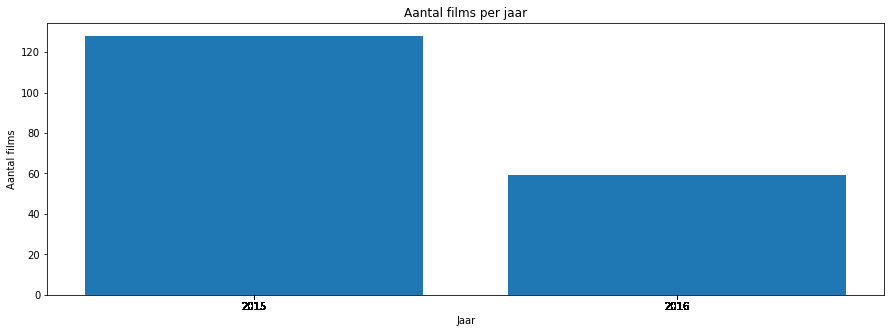

In [16]:
df_limit_data = df_movies[df_movies['title_year'] > 2014]

df_movies_year_count = df_limit_data['title_year'].value_counts()
df_year = df_limit_data['title_year'].unique()

fig, aantal = plt.subplots(figsize=(15,5))
plt.xticks(df_movies['title_year'])
plt.xlabel('Jaar')
plt.ylabel('Aantal films')
plt.title('Aantal films per jaar')

plt.bar(df_year,df_movies_year_count)

plt.show()

# Onderzoeksvraag 1:

### In hoeverre is de omzet van een film te voorspellen op basis van de populariteit op Facebook en IMDB zelf?

In [17]:
# tabel maken met alleen de nodige variabele voor de onderzoeksvraag 

cols = ['movie_title','imdb_score', 'gross','movie_facebook_likes', 'director_facebook_likes', 
        'actor_1_facebook_likes', 'actor_2_facebook_likes', 
        'actor_3_facebook_likes', 'cast_total_facebook_likes']
movies = df_movies[cols]

In [18]:
movies.head(4000)

,movie_title,imdb_score,gross,movie_facebook_likes,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes
0,Avatar,7.9,760505847.0,33000,0.0,1000.0,936.0,855.0,4834
1,Pirates of the Caribbean: At World's End,7.1,309404152.0,0,563.0,40000.0,5000.0,1000.0,48350
2,Spectre,6.8,200074175.0,85000,0.0,11000.0,393.0,161.0,11700
3,The Dark Knight Rises,8.5,448130642.0,164000,22000.0,27000.0,23000.0,23000.0,106759
5,John Carter,6.6,73058679.0,24000,475.0,640.0,632.0,530.0,1873
6,Spider-Man 3,6.2,336530303.0,0,0.0,24000.0,11000.0,4000.0,46055
7,Tangled,7.8,200807262.0,29000,15.0,799.0,553.0,284.0,2036
8,Avengers: Age of Ultron,7.5,458991599.0,118000,0.0,26000.0,21000.0,19000.0,92000
9,Harry Potter and the Half-Blood Prince,7.5,301956980.0,10000,282.0,25000.0,11000.0,10000.0,58753
10,Batman v Superman: Dawn of Justice,6.9,330249062.0,197000,0.0,15000.0,4000.0,2000.0,24450


In [19]:
movies.shape

(3756, 9)

In [20]:
# verwijder alle rijen waar gross gelijk is aan 0
movies.drop(movies[(movies["gross"] == 0)].index,inplace=True)

/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [21]:
movies.shape

(3756, 9)

In [22]:
correlation=movies.corr()
correlation

,imdb_score,gross,movie_facebook_likes,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes
imdb_score,1.000000,0.214740,0.281155,0.192314,0.093597,0.102372,0.065544,0.106803
gross,0.214740,1.000000,0.366933,0.138351,0.144010,0.252842,0.299864,0.235601
movie_facebook_likes,0.281155,0.366933,1.000000,0.161962,0.130300,0.232769,0.271508,0.205564
director_facebook_likes,0.192314,0.138351,0.161962,1.000000,0.089630,0.116058,0.117405,0.118547
actor_1_facebook_likes,0.093597,0.144010,0.130300,0.089630,1.000000,0.391166,0.252408,0.944813
actor_2_facebook_likes,0.102372,0.252842,0.232769,0.116058,0.391166,1.000000,0.553755,0.642991
actor_3_facebook_likes,0.065544,0.299864,0.271508,0.117405,0.252408,0.553755,1.000000,0.489795
cast_total_facebook_likes,0.106803,0.235601,0.205564,0.118547,0.944813,0.642991,0.489795,1.000000


In [23]:
# import seaborn
import seaborn as sns

# zorgt ervoor dat de plots te zien zijn in de notebook
%matplotlib inline

/anaconda3/lib/python3.7/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)
/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


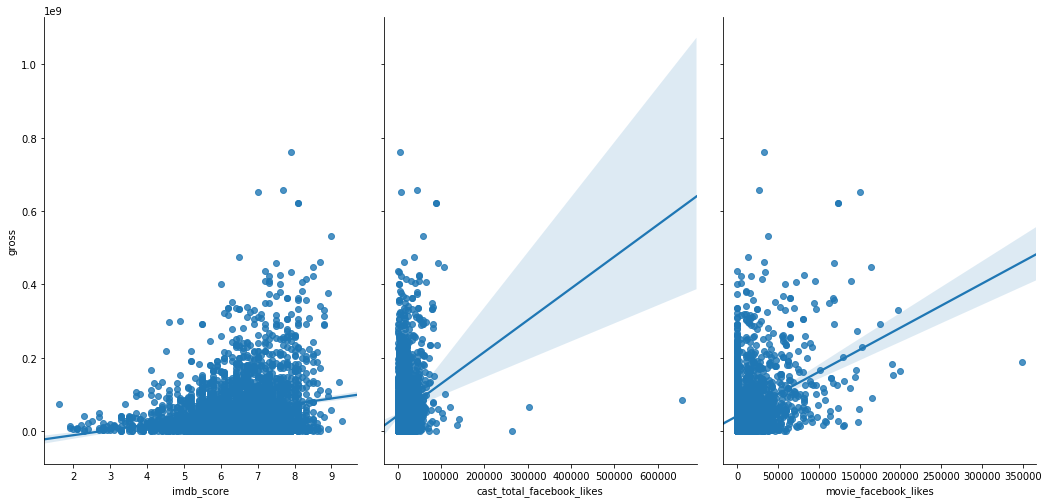

In [24]:
# visaliseer de relatie tussen de features en de response

sns.pairplot(movies, x_vars=['imdb_score','cast_total_facebook_likes','movie_facebook_likes'], y_vars='gross', size=7, aspect=0.7, kind='reg')

#### Model type 

In [25]:
regression_model = LinearRegression()

#### Organiseer de data: features (eigenschappen) en target (resultaat)

##### Wat zijn de  features?

- imdb_score: gegeven cijfer over hoe goed een film is.
- movie_facebook_likes: facebook gebruikers geven aan of ze de film leuk vinden door middel van een like.
- cast_facebook_likes: favebook gebruikers geven door middel van een like aan of ze de cast goed vinden voor een film.


##### What is the response(antwoord)?

- Gross(omzet): omzet van een film.

###### Wat weten we nog meer?

- Omdat de responsvariabele continu is, is dit een regressieprobleem.
- Er zijn 3756 observaties (represented by the rows)

In [26]:
feature_cols = ['imdb_score', 'movie_facebook_likes', 'cast_total_facebook_likes']

x = movies[feature_cols]

x.head()

,imdb_score,movie_facebook_likes,cast_total_facebook_likes
0,7.9,33000,4834
1,7.1,0,48350
2,6.8,85000,11700
3,8.5,164000,106759
5,6.6,24000,1873


In [27]:
y = movies.gross

y.head()

0    760505847.0
1    309404152.0
2    200074175.0
3    448130642.0
5     73058679.0
Name: gross, dtype: float64

In [28]:
print(type(x))
print(x.shape)

<class 'pandas.core.frame.DataFrame'>
(3756, 3)


In [29]:
print(type(y))
print(y.shape)

<class 'pandas.core.series.Series'>
(3756,)


#### Creëer een training- en validatieset

In [30]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=1)

In [31]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2817, 3)
(2817,)
(939, 3)
(939,)


In [32]:
# import model
from sklearn.linear_model import LinearRegression

# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
# print the intercept and coefficients
print(linreg.intercept_)
print(linreg.coef_)

-14454219.74824237
[7.64877362e+06 9.20702146e+02 7.76503761e+02]


In [34]:
list(zip(feature_cols, linreg.coef_))

[('imdb_score', 7648773.6214805255),
 ('movie_facebook_likes', 920.7021459433538),
 ('cast_total_facebook_likes', 776.503760524859)]

$$ y = -14454219.75 + 7648773.62 \times imdbscore + 920.70 \times movie facebooklikes + 776.50 \times casttotal facebooklikes$$

###### Interpetatie:

- Een toename van de imdb_score met 1 verhoogt de brutowinst met 7648773.62 dollar
- Een toename van de cast-totaal facebook-likes met 1 verhoogt de brutowinst met 920.70 dollar
- Een toename van de movie-facebook-likes met 1 verhoogt de brutowinst met 776.50 dollar


##### Valideer het model

In [35]:
# Bereken de determinatiecoëfficient 
y_model = linreg.predict(X_test)
r2_score(y_test, y_model)

0.1787880396007152

In [36]:
# Bereken de _root mean squared error_, gebruik makend van `mean_squared_error()`.
regression_model_mse = mean_squared_error(y_model, y_test)
math.sqrt(regression_model_mse)

65974459.88419453

##### Conclusie onderzoeksvraag (In hoeverre is de omzet van een film te voorspellen op basis van de populariteit op Facebook en IMDB zelf?)

- De voorspellingsfout heeft een standaarddeviatie van 65974459.88 dit betekent dat onze formule niet klopt(nauwkeurig is).
- Verder zie je ook in de data dat veel films met bijna of geen facebook likes ongeveer de zelfde omzet draaien
- We kunnen zeggen dat de imdb-score en de populariteit op facebook bijna geen invloed hebben op de omzet van de film?


# Onderzoeksvraag 2:

### In hoeverre zijn er groepen te onderscheiden op basis van budget, score en facebook likes?

In [19]:
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

# Initialiseer de f1, f2 en f3 arrays

f1 = []
f2 = []
f3 = []

# controlleer of de inkomende waardes geen 0 zijn

for x in df_movies['budget'].values:
    if (x != 0):
        f1.append(x)
        
for y in df_movies['imdb_score'].values:
    if (y != 0):
        f2.append(y)

for z in df_movies['movie_facebook_likes'].values:
    if (z != 0):
        f3.append(z)

# maak er een array van
X = np.array(list(zip(f1, f2, f3)))

### Een overzicht van de huidige gebruikte data in een tabel

In [20]:
moviesdf = pd.DataFrame(X)
moviesdf.columns = ['budget', 'imdb score', 'facebook likes']
moviesdf

,budget,imdb score,facebook likes
0,237000000.0,7.9,33000.0
1,300000000.0,7.1,85000.0
2,245000000.0,6.8,164000.0
3,250000000.0,8.5,24000.0
4,263700000.0,6.6,29000.0
5,258000000.0,6.2,118000.0
6,260000000.0,7.8,10000.0
7,250000000.0,7.5,197000.0
8,250000000.0,7.5,5000.0
9,250000000.0,6.9,48000.0


### Een grafiek waarin de optimale K waarde te vinden is door middel van de 'Elbow Method'

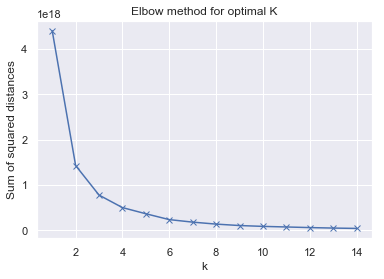

In [21]:
# De 'Elbow method for optimal K' wordt hier toegepast op uit te vinden wat het optimale k aantal is

Sum_of_squared_distances = []
K = range(1,15)

for k in K:
    km = KMeans(n_clusters=k, random_state=0)
    km = km.fit(X)
    Sum_of_squared_distances.append(km.inertia_)
    
# Visualiseer de data
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow method for optimal K')
plt.show()

In [36]:
# Set het aantal clusters het optimale volgens de 'Elbow Method'
k = 3

# doe de clustering
moviesMeans = KMeans(n_clusters=k, random_state=0).fit(X)
y_moviesMeans = moviesMeans.predict(X)

### Een overzicht van de huidige data met daarbij de bijpassende groepen die zijn gecreëerd door de KMeans clustering

In [37]:
# Laat via een table zien bij welke groep elke waarde behoort

moviesdf['Groep'] = moviesMeans.labels_
moviesdf

,budget,imdb score,facebook likes,Groep
0,237000000.0,7.9,33000.0,1
1,300000000.0,7.1,85000.0,1
2,245000000.0,6.8,164000.0,1
3,250000000.0,8.5,24000.0,1
4,263700000.0,6.6,29000.0,1
5,258000000.0,6.2,118000.0,1
6,260000000.0,7.8,10000.0,1
7,250000000.0,7.5,197000.0,1
8,250000000.0,7.5,5000.0,1
9,250000000.0,6.9,48000.0,1


### Een visualisatie van de KMeans data met daarbij de bijbehorende clustermiddelpunten

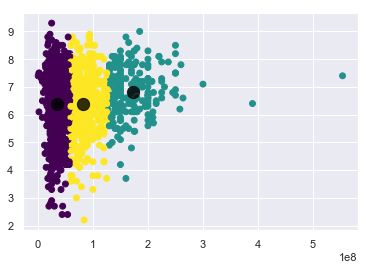

In [38]:
# Visualiseer de data
plt.scatter(X[:, 0], X[:, 1], c=y_moviesMeans, s=35, cmap='viridis')

# Visualiseer het midden van de Clusters
centers = moviesMeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=150, alpha=0.8)

### Conclusie

##### Zoals er te zien is in het grafiek hierboven bevind alle data zich vrij dicht bij elkaar. Behalve een enkel aantal records zit alle data vrij dicht tegen de bijbehorende clusters aan.
##### Met deze informatie in gedachten zou je kunnen stellen dat er meerdere groepen zijn omdat er tenslotte meerdere clusters zijn. Zelf ben ik van gedachten dat de verkregen data te dicht op elkaar zit om er duidelijk aparte groepen uit te halen. 
##### Je zou de enkele afwijkende records als aparte groep kunnen benoemen, maar ik vind dat er hiervoor te weinig van zijn om het een aparte groep te noemen. En zelfs dan zou je eigenlijk maar 2 groepen hebben. De groep die vooral bij elkaar valt en de enkele die daar buiten vallen.

#### Vandaar trekken wij de conclusie dat het met de huidige beschikbare data niet mogelijk is aparte groepen te onderscheiden door middel van de KMeans method.


# Onderzoeksvraag 3: 

### In hoeverre is een relatie te zien tussen de omzet van de film en de verhouding tussen de geslacht van de hoofdrolspelers in de film?

In [37]:
# importeer Externe bronnen
df_actors = pd.read_csv("actors.csv")
df_movies_metadata = pd.read_csv("movies_metadata.csv", low_memory=False)
df_actors.head(10)

,Unnamed: 0,cast_id,gender,id,name,order,movie_id
0,1,14,2,31,Tom Hanks,0,862
1,2,15,2,12898,Tim Allen,1,862
2,3,16,2,7167,Don Rickles,2,862
3,4,17,2,12899,Jim Varney,3,862
4,5,18,2,12900,Wallace Shawn,4,862
5,6,19,2,7907,John Ratzenberger,5,862
6,7,20,1,8873,Annie Potts,6,862
7,8,26,0,1116442,John Morris,7,862
8,9,22,2,12901,Erik von Detten,8,862
9,10,23,1,12133,Laurie Metcalf,9,862


In [38]:
df_movies_metadata.head(10)

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",21.946943,/rhIRbceoE9lR4veEXuwCC2wARtG.jpg,"[{'name': 'Pixar Animation Studios', 'id': 3}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,17.015539,/vzmL6fP7aPKNKPRTFnZmiUfciyV.jpg,"[{'name': 'TriStar Pictures', 'id': 559}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,11.7129,/6ksm1sjKMFLbO7UY2i6G1ju9SML.jpg,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",3.859495,/16XOMpEaLWkrcPqSQqhTmeJuqQl.jpg,[{'name': 'Twentieth Century Fox Film Corporat...,"[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,8.387519,/e64sOI48hQXyru7naBFyssKFxVd.jpg,"[{'name': 'Sandollar Productions', 'id': 5842}...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0
5,False,NaN,60000000,"[{'id': 28, 'name': 'Action'}, {'id': 80, 'nam...",NaN,949,tt0113277,en,Heat,"Obsessive master thief, Neil McCauley leads a ...",17.924927,/zMyfPUelumio3tiDKPffaUpsQTD.jpg,"[{'name': 'Regency Enterprises', 'id': 508}, {...","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-15,187436818.0,170.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,A Los Angeles Crime Saga,Heat,False,7.7,1886.0
6,False,NaN,58000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,11860,tt0114319,en,Sabrina,An ugly duckling having undergone a remarkable...,6.677277,/jQh15y5YB7bWz1NtffNZmRw0s9D.jpg,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'DE', 'name': 'Germany'}, {'is...",1995-12-15,0.0,127.0,"[{'iso_639_1': 'fr', 'name': 'Français'}, {'is...",Released,You are cordially invited to the most surprisi...,Sabrina,False,6.2,141.0
7,False,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",NaN,45325,tt0112302,en,Tom and Huck,"A mischievous young boy, Tom Sawyer, witnesses...",2.561161,/sGO5Qa55p7wTu7FJcX4H4xIVKvS.jpg,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",1995-12-22,0.0,97.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,The Original Bad Boys.,To

In [39]:
# check null values
pd.isnull(df_actors).sum()

Unnamed: 0    0
cast_id       0
gender        0
id            0
name          0
order         0
movie_id      0
dtype: int64

In [40]:
# check null values "id"
pd.isnull(df_movies_metadata["id"]).sum()

0

In [41]:
# check null values "original_title"
pd.isnull(df_movies_metadata["original_title"]).sum()

0

### Alles tot nu toe gucci 

In [42]:
df_merge_actors_movies = pd.merge(df_actors, df_movies_metadata, left_on='movie_id', right_index=True)

In [43]:
df_merge_actors_movies.head()

,Unnamed: 0,cast_id,gender,id_x,name,order,movie_id,adult,belongs_to_collection,budget,genres,homepage,id_y,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,1,14,2,31,Tom Hanks,0,862,False,NaN,0,[],NaN,101230,tt0109001,nl,06,"Sarah, 30, single, well educated, likes art, p...",0.062128,/xnsvk2a8BbvGfnFdynKSuA4qVFq.jpg,[],[],1994-09-01,0.0,0.0,"[{'iso_639_1': 'nl', 'name': 'Nederlands'}, {'...",Released,NaN,1-900,False,5.0,1.0
1,2,15,2,12898,Tim Allen,1,862,False,NaN,0,[],NaN,101230,tt0109001,nl,06,"Sarah, 30, single, well educated, likes art, p...",0.062128,/xnsvk2a8BbvGfnFdynKSuA4qVFq.jpg,[],[],1994-09-01,0.0,0.0,"[{'iso_639_1': 'nl', 'name': 'Nederlands'}, {'...",Released,NaN,1-900,False,5.0,1.0
2,3,16,2,7167,Don Rickles,2,862,False,NaN,0,[],NaN,101230,tt0109001,nl,06,"Sarah, 30, single, well educated, likes art, p...",0.062128,/xnsvk2a8BbvGfnFdynKSuA4qVFq.jpg,[],[],1994-09-01,0.0,0.0,"[{'iso_639_1': 'nl', 'name': 'Nederlands'}, {'...",Released,NaN,1-900,False,5.0,1.0
3,4,17,2,12899,Jim Varney,3,862,False,NaN,0,[],NaN,101230,tt0109001,nl,06,"Sarah, 30, single, well educated, likes art, p...",0.062128,/xnsvk2a8BbvGfnFdynKSuA4qVFq.jpg,[],[],1994-09-01,0.0,0.0,"[{'iso_639_1': 'nl', 'name': 'Nederlands'}, {'...",Released,NaN,1-900,False,5.0,1.0
4,5,18,2,12900,Wallace Shawn,4,862,False,NaN,0,[],NaN,101230,tt0109001,nl,06,"Sarah, 30, single, well educated, likes art, p...",0.062128,/xnsvk2a8BbvGfnFdynKSuA4qVFq.jpg,[],[],1994-09-01,0.0,0.0,"[{'iso_639_1': 'nl', 'name': 'Nederlands'}, {'...",Released,NaN,1-900,False,5.0,1.0


In [44]:
# merge de 2 externe met movies.csv
df_merge_everything = pd.merge(df_movies, df_merge_actors_movies, left_on='movie_title', 
                               right_on='original_title', how='inner')

In [45]:
# kijken of alles goed gaat.
df_merge_everything.head()

,movie_title,imdb_score,title_year,genres_x,duration,budget_x,gross,color,language,country,director_name,actor_1_name,actor_2_name,actor_3_name,movie_imdb_link,facenumber_in_poster,plot_keywords,content_rating,aspect_ratio,num_user_for_reviews,num_voted_users,num_critic_for_reviews,movie_facebook_likes,director_facebook_likes,actor_1_facebook_likes,actor_2_facebook_likes,actor_3_facebook_likes,cast_total_facebook_likes,Unnamed: 0,cast_id,gender,id_x,name,order,movie_id,adult,belongs_to_collection,budget_y,genres_y,homepage,id_y,imdb_id,original_language,original_title,overview,popularity,poster_path,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,Avatar,7.9,2009.0,Action|Adventure|Fantasy|Sci-Fi,178.0,237000000.0,760505847.0,Color,English,USA,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,0.0,avatar|future|marine|native|paraplegic,PG-13,1.78,3054.0,886204,723.0,33000,0.0,1000.0,936.0,855.0,4834,104262,1,2,854,James Stewart,0,14551,False,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",185.070892,/kmcqlZGaSh20zpTbuoF0Cdn07dT.jpg,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2.787965e+09,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,False,7.2,12114.0
1,Avatar,7.9,2009.0,Action|Adventure|Fantasy|Sci-Fi,178.0,237000000.0,760505847.0,Color,English,USA,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,0.0,avatar|future|marine|native|paraplegic,PG-13,1.78,3054.0,886204,723.0,33000,0.0,1000.0,936.0,855.0,4834,104263,2,1,7632,Shelley Winters,1,14551,False,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",185.070892,/kmcqlZGaSh20zpTbuoF0Cdn07dT.jpg,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2.787965e+09,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,False,7.2,12114.0
2,Avatar,7.9,2009.0,Action|Adventure|Fantasy|Sci-Fi,178.0,237000000.0,760505847.0,Color,English,USA,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,0.0,avatar|future|marine|native|paraplegic,PG-13,1.78,3054.0,886204,723.0,33000,0.0,1000.0,936.0,855.0,4834,104264,3,2,64212,Dan Duryea,2,14551,False,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",185.070892,/kmcqlZGaSh20zpTbuoF0Cdn07dT.jpg,"[{'name': 'Ingenious Film Partners', 'id': 289...","[{'iso_3166_1': 'US', 'name': 'United States o...",2009-12-10,2.787965e+09,162.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Enter the World of Pandora.,Avatar,False,7.2,12114.0
3,Avatar,7.9,2009.0,Action|Adventure|Fantasy|Sci-Fi,178.0,237000000.0,760505847.0,Color,English,USA,James Cameron,CCH Pounder,Joel David Moore,Wes Studi,http://www.imdb.com/title/tt0499549/?ref_=fn_t...,0.0,avatar|future|marine|native|paraplegic,PG-13,1.78,3054.0,886204,723.0,33000,0.0,1000.0,936.0,855.0,4834,104265,4,0,37448,Stephen McNally,3,14551,False,"{'id': 87096, 'name': 'Avatar Collection', 'po...",237000000,"[{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...",http://www.avatarmovie.com/,19995,tt0499549,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",185.070892,/kmcqlZGaSh20zpTbuoF0Cdn07dT.jpg,"[{'name': 'Ingenious Film Partn

In [46]:
# verwijder alle tabellen die ik niet nodig heb voor de visualisatie
df_merge_everything.drop(['movie_title', 'imdb_score', 'genres_x', 'duration', 
                          'color', 'language', 'country', 'director_name', 'actor_1_name', 'actor_2_name', 
                         'actor_3_name', 'movie_imdb_link', 'facenumber_in_poster', 'plot_keywords', 'content_rating', 
                         'aspect_ratio', 'num_user_for_reviews', 'num_voted_users', 'num_critic_for_reviews', 'movie_facebook_likes', 
                         'director_facebook_likes', 'actor_1_facebook_likes', 'actor_2_facebook_likes', 'actor_3_facebook_likes', 
                         'cast_total_facebook_likes', 'cast_id', 'id_x', 'name', 'movie_id', 'adult', 'belongs_to_collection', 
                         'genres_y', 'homepage', 'id_y', 'imdb_id', 'original_title', 'overview', 'popularity', 'poster_path', 
                         'production_companies', 'production_countries', 'release_date', 'runtime', 'spoken_languages', 'status', 'tagline', 
                         'title', 'video', 'vote_average', 'vote_count', 'Unnamed: 0', 'original_language'], axis=1, inplace=True)

In [47]:
# kijken of alles goed gaat.
df_merge_everything.describe()

,title_year,budget_x,gross,gender,order,revenue
count,31047.000000,3.104700e+04,3.104700e+04,31047.000000,31047.000000,3.104700e+04
mean,2002.053854,4.149748e+07,5.660505e+07,1.103424,14.407125,9.850667e+07
std,10.045391,6.238043e+07,7.919047e+07,0.887560,16.734473,1.964932e+08
min,1927.000000,2.180000e+02,1.620000e+02,0.000000,0.000000,0.000000e+00
25%,1996.000000,1.100000e+07,9.528092e+06,0.000000,4.000000,0.000000e+00
50%,2005.000000,2.500000e+07,3.235753e+07,1.000000,9.000000,3.220403e+07
75%,2009.000000,5.200000e+07,7.049680e+07,2.000000,18.000000,1.161124e+08
max,2016.000000,2.127520e+09,7.605058e+08,2.000000,152.000000,2.787965e+09


In [48]:
# ik wil alleen de belangrijkste acteurs(hoofdrolspelers) hebben
df_final = df_merge_everything[df_merge_everything.order == 0]

In [49]:
df_final.head()

,title_year,budget_x,gross,gender,order,budget_y,revenue
0,2009.0,237000000.0,760505847.0,2,0,237000000,2.787965e+09
49,2007.0,300000000.0,309404152.0,2,0,300000000,9.610000e+08
68,2012.0,250000000.0,448130642.0,2,0,250000000,1.084939e+09
80,2007.0,258000000.0,336530303.0,2,0,258000000,8.908716e+08
104,2007.0,258000000.0,336530303.0,2,0,258000000,8.908716e+08


In [50]:
# even kijken hoeveel mannen en vrouwen
df_final['gender'].value_counts()

2    1187
1     348
0     191
Name: gender, dtype: int64

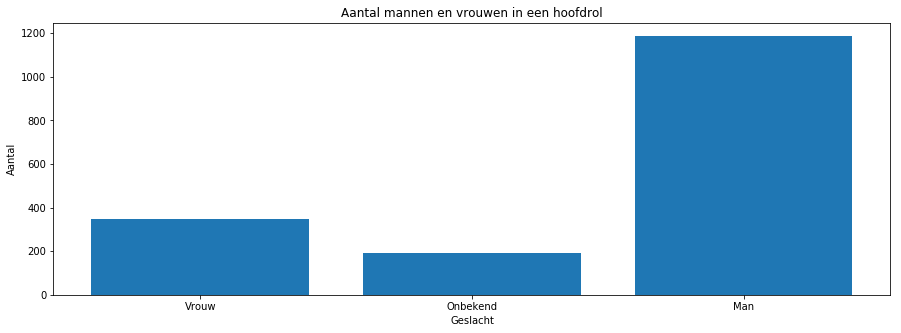

In [51]:
# Toon een barchart van de geslachten.
gender_name = ['Man', 'Vrouw', 'Onbekend']
genders = df_final['gender'].unique()
counter_per_gender = df_final['gender'].value_counts()

fig, aantal = plt.subplots(figsize=(15,5))
plt.xticks(genders, gender_name)
plt.xlabel('Geslacht')
plt.ylabel('Aantal')
plt.title('Aantal mannen en vrouwen in een hoofdrol')

plt.bar(genders, counter_per_gender)

plt.show()

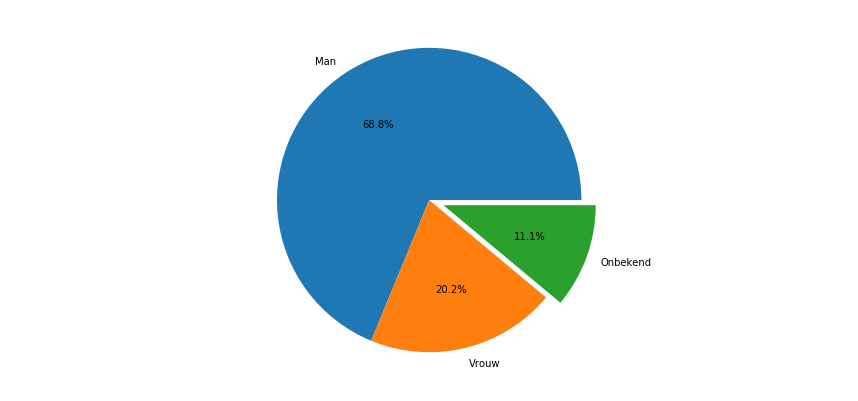

In [52]:
gender_name = ['Man', 'Vrouw', 'Onbekend']
counter_per_gender = df_final['gender'].value_counts()

fig, aantal = plt.subplots(figsize=(15,7))
plt.axis("equal")
plt.pie(counter_per_gender, labels=gender_name, autopct='%0.1f%%', explode=[0,0,0.1])
plt.show()

In [53]:
# Drop de rows met geslacht 'onbekend'
df_gender_data = df_final[df_final.gender != 0]

In [54]:
# gemiddelde budget per geslacht
df_gender_data.groupby(df_gender_data['gender']).mean().budget_x

gender
1    4.164706e+07
2    4.338875e+07
Name: budget_x, dtype: float64

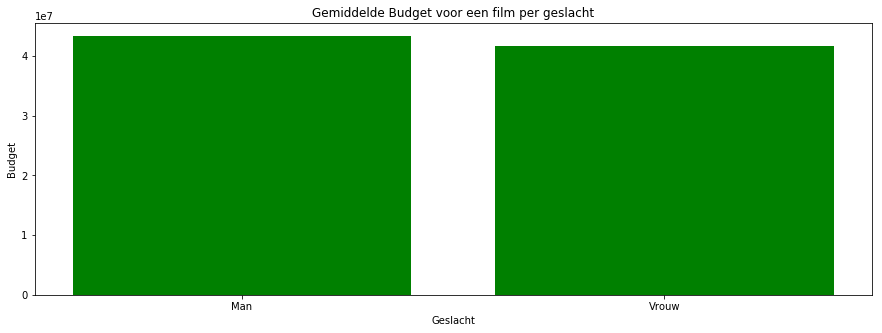

In [55]:
# Toon het in een barchart
gender_name = ['Vrouw', 'Man']
genders = df_gender_data['gender'].unique()
counter_per_gender = df_gender_data.groupby(df_gender_data['gender']).mean().budget_x

fig, aantal = plt.subplots(figsize=(15,5))
plt.xticks(genders, gender_name)
plt.xlabel('Geslacht')
plt.ylabel('Budget')
plt.title('Gemiddelde Budget voor een film per geslacht')

plt.bar(genders, counter_per_gender, color='green')

plt.show()

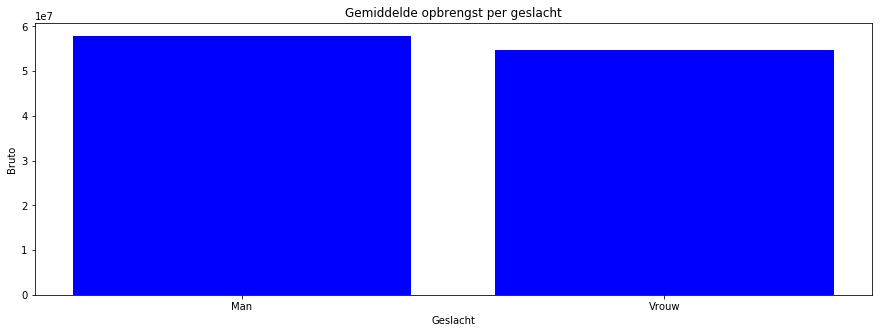

In [56]:
# Toon het in een barchart
gender_name = ['Vrouw', 'Man']
genders = df_gender_data['gender'].unique()
counter_per_gender = df_gender_data.groupby(df_gender_data['gender']).mean().gross

fig, aantal = plt.subplots(figsize=(15,5))
plt.xticks(genders, gender_name)
plt.xlabel('Geslacht')
plt.ylabel('Bruto')
plt.title('Gemiddelde opbrengst per geslacht')

plt.bar(genders, counter_per_gender, color='blue')

plt.show()

In [57]:
# Ik wil per jaartal weten hoeveel mannelijke/vrouwelijke hoofdacteurs er waren en totaal.
year_gender = df_gender_data.groupby(['title_year', 'gender']).size()
df_gender_year = year_gender.to_frame()
df_gender_year.rename(columns={0 : 'count'}, inplace=True)
df_gender_year = df_gender_year.unstack(fill_value=0)
df_gender_year = df_gender_year.loc[1980:]
df_gender_year['total'] = df_gender_year[('count', 1)] + df_gender_year[('count', 2)]
df_gender_year.head()

count     total
gender         1   2      
title_year                
1980.0         5   4     9
1981.0         0   4     4
1982.0         0   7     7
1983.0         3   2     5
1984.0         2  13    15

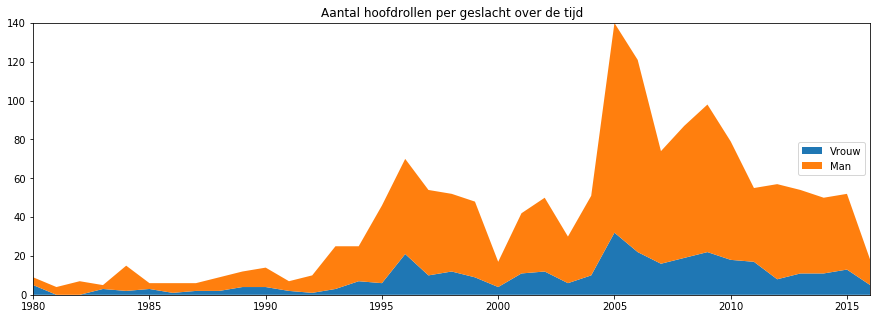

In [58]:
# toon de gegevens in een stackplot
fig2, verdeling = plt.subplots(figsize=(15,5))
verdeling.stackplot(df_gender_year.index, df_gender_year[('count', 1)], df_gender_year[('count', 2)], labels=['Vrouw', 'Man'])
verdeling.legend(loc='right')
verdeling.margins(0,0)
plt.title('Aantal hoofdrollen per geslacht over de tijd')
plt.show()

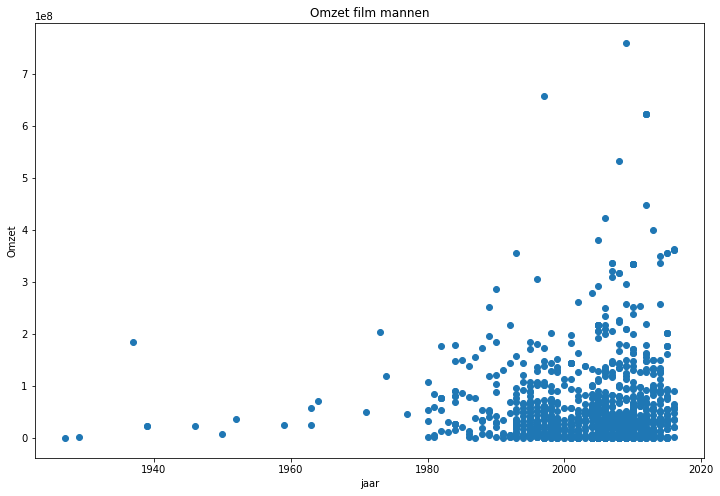

In [59]:
# omzet van de mannen
df_omzet_mannen = df_gender_data.loc[df_gender_data['gender'] == 2]

fig, scatter = plt.subplots(figsize=(12,8))
scatter.scatter(df_omzet_mannen['title_year'], df_omzet_mannen['gross'])
scatter.set_title('Omzet film mannen')
plt.ylabel('Omzet')
plt.xlabel('jaar')
plt.show()

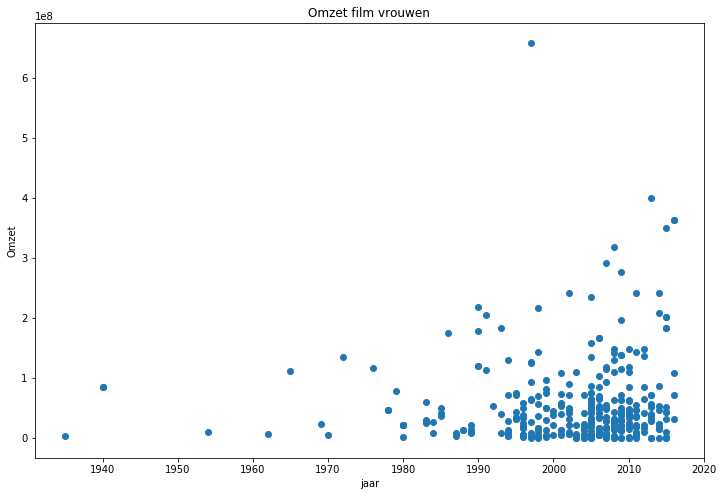

In [60]:
# omzet van de vrouwen
df_omzet_vrouwen = df_gender_data.loc[df_gender_data['gender'] == 1]

fig, scatter = plt.subplots(figsize=(12,8))
scatter.scatter(df_omzet_vrouwen['title_year'], df_omzet_vrouwen['gross'])
scatter.set_title('Omzet film vrouwen')
plt.ylabel('Omzet')
plt.xlabel('jaar')
plt.show()

# Conclusie

Uit mijn onderzoekt blijkt dat er geen correlatie is gevonden. 
In de scatter plot zie je dat er wel veel meer mannen zijn die een hoofdrol hebben dan vrouwen. 
Uit de barchart blijkt ook dat het budget hoger is voor een film als de hoofdrol speler een man is.